NoShow Appointment Data Analysis
---------------------------------------------------

### Dataset Description:
----------------------------
1-This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

2-‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

13 dependent variables:
Columns names
PatientId,AppointmentID	,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,	Handicap,SMS_received,
only one independent variable
No-show


### Observations:                                                                                                                                                                                  
datatype changes:                                                                                                                            
1-PatientId column datatype is float have to change to int64                                                                              
2-Gender column datatype is object change to string                                                                                      
3-ScheduledDay and AppointmentDay columns datatype is object change to datetime                                                            
4-Neighbourhood column datatype is object change to string                                                                                
5-No-show column datatype is object change to string                                                                                       



### Important Questions:
------------------------------
1-Does Gender has effect how people show in the Scheduled day                                                                   
2-Do the patients have preference of certain days to show up                                                                    
3-Does age has effect how people show in the Scheduled day.                                                                                
4-Does the address of the patient has effect on wether the patient will show up or not                                                   
5-Does the Scholarship of the patient has effect on wether the patient will show up or not                                             
6-If the patient received an SMS,does this affect how he shows up or not.



## Data Wrangling

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df=pd.read_csv('noshowappointments.csv')
print(df)

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html


           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+14        5636249      M  2016

#### Remove unnecessary columns

In [2]:
#create function receive list and data frame and returns a dataframe after droping a column
# input : data ,type: dataframe object
#input  :lst   ,type: list 
def drop_col(data,lst):
 return data.drop(lst, axis=1, inplace=True) 

drop_col(df,['PatientId', 'AppointmentID'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


#### Rename columns to a standard form

In [4]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


#### Change Data types

In [5]:
df['Gender']=df['Gender'].astype('str')
# Replace bad data
df['ScheduledDay']= df['ScheduledDay'].replace('T',' ').replace('Z',' ')
df['ScheduledDay']=df['ScheduledDay'].astype('datetime64[ns]')


df['AppointmentDay']= df['AppointmentDay'].replace('T',' ').replace('Z',' ') 
df['AppointmentDay']=df['AppointmentDay'].astype('datetime64[ns]')

# Applying this to the whole columns using the .to_datetime() method in panads
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')
print(df['ScheduledDay'].head())
print('\n')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')
print(df['AppointmentDay'].head())
 #Create new field for day name 
df['AppointmentDayName']=df['AppointmentDay'].dt.day_name()

df['AppointmentDayName']


0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
5            Friday
6            Friday
7            Friday
8            Friday
9            Friday
10           Friday
11           Friday
12           Friday
13           Friday
14           Friday
15           Friday
16           Friday
17           Friday
18           Friday
19           Friday
20           Friday
21           Friday
22           Friday
23           Friday
24           Friday
25           Friday
26           Friday
27           Friday
28           Friday
29           Friday
            ...    
110497    Wednesday
110498    Wednesday
110499    Wednesday
110500    Wednesday
110501    Wednesday
110502    Wednesday
110503    Wednesday
110504    Wednesday
110505    Wednesday
110506    Wednesday
110507    Wednesday
110508    Wednesday
110509    Wednesday
110510    Wednesday
110511    Wednesday
110512    Wednesday
110513    Wednesday
110514    Wednesday
110515    Wednesday


### Convert fields to boolean
replace 'No' and'Yes' to 0 and 1 and change 'Scholarship', 'Hypertension', 'Alcoholism', 'Diabetes', 'SMS_received', 'No_show' fields to boolean datatype
Note:I get the help of this code from  https://github.com/stefan-cornelissen/Investigate-a-Dataset---No-Shows-Medical-Appointments-Brazil-Udacity-Project/blob/master/Udacity%20Project%20Investigate%20a%20Dataset.ipynb

In [6]:
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)

bool_columns=['Scholarship', 'Hypertension', 'Alcoholism', 'Diabetes', 'SMS_received', 'No_show']
for column in df[bool_columns]:
    #Conversion to boolean, by iterating through concerning colums.
    df[column] = df[column].astype('bool', inplace=True)
    
    #Check conversion took place corretly?
    print(df[column].value_counts())
    print('\n')

#Check whether conversion took place correctly. Answer: yes, identitical amounts of '0' resp. 'False' and  
# '1' resp. 'True' values.

False    99666
True     10861
Name: Scholarship, dtype: int64


False    88726
True     21801
Name: Hypertension, dtype: int64


False    107167
True       3360
Name: Alcoholism, dtype: int64


False    102584
True       7943
Name: Diabetes, dtype: int64


False    75045
True     35482
Name: SMS_received, dtype: int64


False    88208
True     22319
Name: No_show, dtype: int64




#### Remove duplicate rows

In [7]:
#create function receive string and data frame that prints count of duplicated rows
# input : str ,type: string
#input  :data   ,type: dataframe 
def print_dublicate(str,data):
   print(str,sum(data.duplicated()))

print_dublicate('Duplicated count: ',df)
df.drop_duplicates( inplace = True)
print_dublicate('Duplicated count: ',df)

Duplicated count:  635
Duplicated count:  0


#### Cleaning data in the age column converting negative values to the mean age

In [8]:
df[df['Age'] <= 0] = df['Age'].mean()

#### Find NaN values

In [9]:
pd.isna(df).sum()

Gender                0
ScheduledDay          0
AppointmentDay        0
Age                   0
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No_show               0
AppointmentDayName    0
dtype: int64

#### Remove wrong data in 'Gender' column

In [10]:
a= df[df["Gender"]==37.08950606049576].index
b= df[df["Handicap"]==37.08950606].index
df.drop(index= a,axis=0,inplace= True)
df.drop(index= b,axis=0,inplace= True)

a= df["Gender"].unique()
b= df["Handicap"].unique()
c= df["Scholarship"].unique()
d= df["No_show"].unique()
print(a,b,c,d)


['F' 'M'] [ 0.  1.  2.  3.  4.] [False True] [False True]


## Exploratory Data Analysis


In [11]:
df.describe()


,Age,Handicap
count,106361.000000,106361.000000
mean,38.320822,0.022856
std,22.475574,0.163448
min,1.000000,0.000000
25%,19.000000,0.000000
50%,38.000000,0.000000
75%,56.000000,0.000000
max,115.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f541af8a978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f54194f92b0>]], dtype=object)

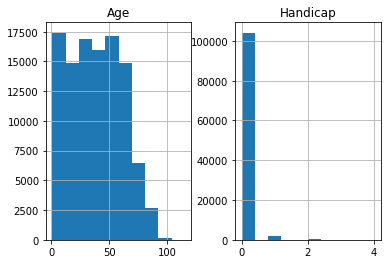

In [12]:
df.hist()



Text(0,0.5,'Handicap')

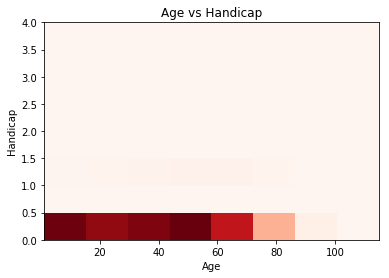

In [13]:
plt.hist2d(df['Age'], df['Handicap'], cmap='Reds',bins=8);
plt.title('Age vs Handicap')
plt.xlabel('Age')
plt.ylabel('Handicap')

### Research Question 1  (Does Gender has effect how people show in the Scheduled day)

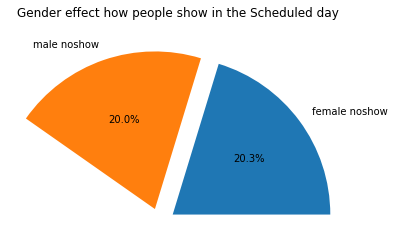

No of patients do not show:  21462
No of patients shows in time:  84899
No of Females in total:  69699
No of males in total:  36662
ratio of noshow females to total females:  0.202829308885
ratio of noshow males to total females:  0.199798156129


In [14]:
#create a list of count of males and females that do not show
Gender_Noshow=list(df[df['No_show']==1].groupby('Gender')['No_show'].count())

#scaling no of total females and males to get good indication
Noshow_females_scaled=Gender_Noshow[0]/df[df['Gender']=='F']['Gender'].count()
Noshow_males_scaled=Gender_Noshow[1]/df[df['Gender']=='M']['Gender'].count()
Noshow_males=Gender_Noshow[1]

plt.pie([Noshow_females_scaled,Noshow_males_scaled], labels=('female noshow','male noshow'),explode = [0.1,0.1],autopct ='%1.1f%%')
plt.axis('equal')
plt.title('Gender effect how people show in the Scheduled day')
plt.show()
print('No of patients do not show: ',df[df['No_show']==1]['No_show'].count())
print('No of patients shows in time: ',df[df['No_show']==0]['No_show'].count())
print('No of Females in total: ',df[df['Gender']=='F']['Gender'].count())
print('No of males in total: ',df[df['Gender']=='M']['Gender'].count())
print('ratio of noshow females to total females: ',Noshow_females_scaled)
print('ratio of noshow males to total females: ',Noshow_males_scaled)




As we see Gender has no effect on wether the patient will show on the appointment day or not because the
ratio of each gender no-show to the total number of that gender is equal as the statistical data

### Research Question 2(Do the patients have preference of certain days to show up)

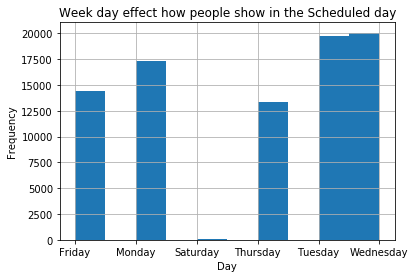

In [15]:
### 

df_day_showup=df[df['No_show']==0]['AppointmentDayName']
df_day_showup.hist();
plt.xlabel('Day');
plt.ylabel('Frequency');
plt.title('Week day effect how people show in the Scheduled day');

 It appears thatPatients prefer go to hospital on Teusday and Wednsday more  fairly frequently

### Research Question 3 :Does age has effect how people show in or not in the appointment day

Text(0,0.5,'Frequency')

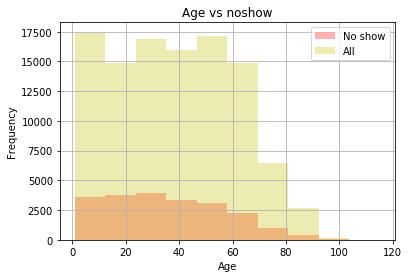

In [16]:
#ages of patients no show on time
age_noShow=df[df['No_show']==1]['Age']

age_noShow.hist(color='r',alpha=0.3);
df['Age'].hist(color='y',alpha=0.3);
plt.legend(['No show', 'All'])
plt.title('Age vs noshow')
plt.xlabel('Age')
plt.ylabel('Frequency')



Average age does not show in time:  35.2998788557
Average age  show in time:  39.0845004064


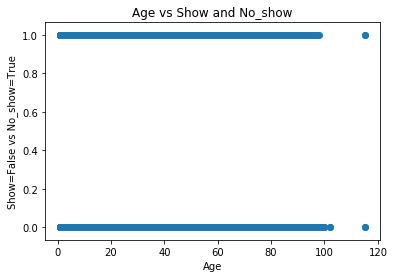

In [17]:
plt.scatter(df['Age'],df['No_show']);
print('Average age does not show in time: ',df[df['No_show']==1]['Age'].mean())
print('Average age  show in time: ',df[df['No_show']==0]['Age'].mean())
plt.title('Age vs Show and No_show');
plt.xlabel('Age');
plt.ylabel('Show=False vs No_show=True');

The effect of age on the behavior of patients attending in the appointment is almost negligable

### Research Question 4 :Does the address of the patient has effect on wether the patient will show up or not

AEROPORTO              0.125000
ANDORINHAS             0.228021
ANTÔNIO HONÓRIO        0.175097
ARIOVALDO FAVALESSA    0.229323
BARRO VERMELHO         0.218225
BELA VISTA             0.194399
BENTO FERREIRA         0.220118
BOA VISTA              0.190164
BONFIM                 0.199033
CARATOÍRA              0.234483
CENTRO                 0.209945
COMDUSA                0.176080
CONQUISTA              0.185644
CONSOLAÇÃO             0.168939
CRUZAMENTO             0.217682
DA PENHA               0.196637
DE LOURDES             0.151515
DO CABRAL              0.157303
DO MOSCOSO             0.226463
DO QUADRO              0.163415
ENSEADA DO SUÁ         0.222707
ESTRELINHA             0.196629
FONTE GRANDE           0.221212
FORTE SÃO JOÃO         0.181208
FRADINHOS              0.181102
GOIABEIRAS             0.195620
GRANDE VITÓRIA         0.203582
GURIGICA               0.224802
HORTO                  0.228916
ILHA DAS CAIEIRAS      0.227948
                         ...   
PARQUE I

Text(0,0.5,'Count of Addresses')

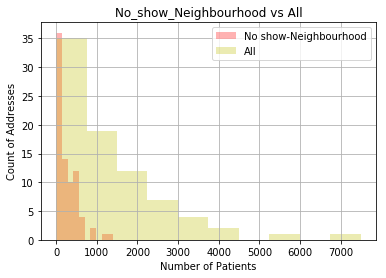

In [18]:
No_show_Neighbourhood=df[df['No_show']==1]['Neighbourhood'].value_counts()
#scaling no show counts to totals
print(df[df['No_show']==1]['Neighbourhood'].value_counts()/df['Neighbourhood'].value_counts())

show_Neighbourhood=df['Neighbourhood'].value_counts()
No_show_Neighbourhood.hist(color='r',alpha=0.3)
show_Neighbourhood.hist(color='y',alpha=0.3)
plt.title('No_show_Neighbourhood vs All')
plt.legend(['No show-Neighbourhood', 'All'])
plt.xlabel('Number of Patients')
plt.ylabel('Count of Addresses')


from the scaled ratio between No shows to totals counts of addresses no strong relation between address and no show behavior

### Research Question 5 :Does the Scholarship of the patient has effect on wether the patient will show up or not

 percentage of correlation:  88.12319448327275


Text(0.5,0,'Frequency scholarship (True vs False)')

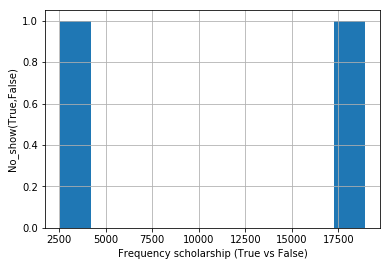

In [19]:
noshow_scholarship=df[df['No_show']==1].groupby('Scholarship')['Scholarship'].count()

#print(pd.DataFrame(noshow_scholarship))
noshow_scholarship.hist();
#correlation
print(' percentage of correlation: ',18913*100/(2549+18913))
plt.ylabel('No_show(True,False)')
plt.xlabel('Frequency scholarship (True vs False)')

percentage of correlation:  88.12319448327275 .Strong relation between Scholarship and being on time for the scheduledday

### Research Question 6:If the patient received an SMS,does this affect how he shows up or not.

              SMS_received
SMS_received              
False                11894
True                  9568
41.761174116077385


Text(0.5,0,'Frequency Received SMS (True vs False)')

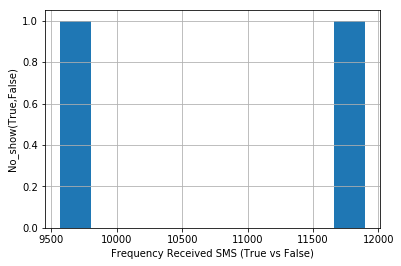

In [20]:
noshow_SMS_received=df[df['No_show']==True].groupby('SMS_received')['SMS_received'].count()
print(pd.DataFrame(noshow_SMS_received))
noshow_SMS_received.hist();
#correlation
print(11894*100/(9568+18913))
plt.ylabel('No_show(True,False)')
plt.xlabel('Frequency Received SMS (True vs False)')

percentage of correlation:  41.761174116077385 .week relation between receiving an SMS and being on time for the scheduledday

##### <a id='conclusions'></a>
## Conclusions
#### Research Question 1  (Does Gender has effect how people show in the Scheduled day)
1- Gender has no effect on wether the patient will show on the appointment day or not because the 

ratio of each gender no-show to the total number of that gender is equal as the statistical data 

reveal

No of patients do not show:  21680

No of patients shows in time:  85307

No of Females in total:  70118

No of males in total:  36869

ratio of noshow females to total females:  0.203585384637

ratio of noshow males to total females:  0.200846239388

#### Research Question 2(Do the patients have preference of certain days to show up)
2-Patients prefer go to hospital on Teusday and Wednsday more frequent than the other days while on 

Saturday the count of people is zero( may be weekend vacation in hospital)
#### Research Question 3 :Does age has effect how people show in or not in the appointment day
3-As the histograms show no considered effect on different ages of patients on the behavior of atending in the scheduled day  

Average age show in time:  35.2998788557
Average age does not show in time:  39.0845004064
#### Research Question 4 :Does the address of the patient has effect on wether the patient will show up or not
4-As shown from the scaled ratio between No shows to totals counts of addresses no strong relation between address and no show behavior
#### Research Question 5 :Does the Scholarship of the patient has effect on wether the patient will show up or not
 A strong relationship(88%) between scholarship and showing up in the scheduled day and the opposite is true those who do not show up and not having scholarship
#### Research Question 6:If the patient received an SMS,does this affect how he shows up or not
 A moderate relationship (41%) between Receiving SMS and showing up in the scheduled day
### Limitations
The only one limitation to this dataset that it is of small size that the statistical output will not reflect the perfect results
 

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0